In [ ]:
%pip install pandas

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
import mplcursors
import math
import bisect
from colour import Color
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom

from standard_codes import model_dict, time_dict, problem_dict
from processed_data import *
from helper_functions import *


plt.style.use('default')
    

all_colors = ['', '#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#00ffff', 
                '#777777',
              '#7700ff', '#0077ff', '#00ff77', '#777700', '#77ff77', '#ff7777', '#000000']


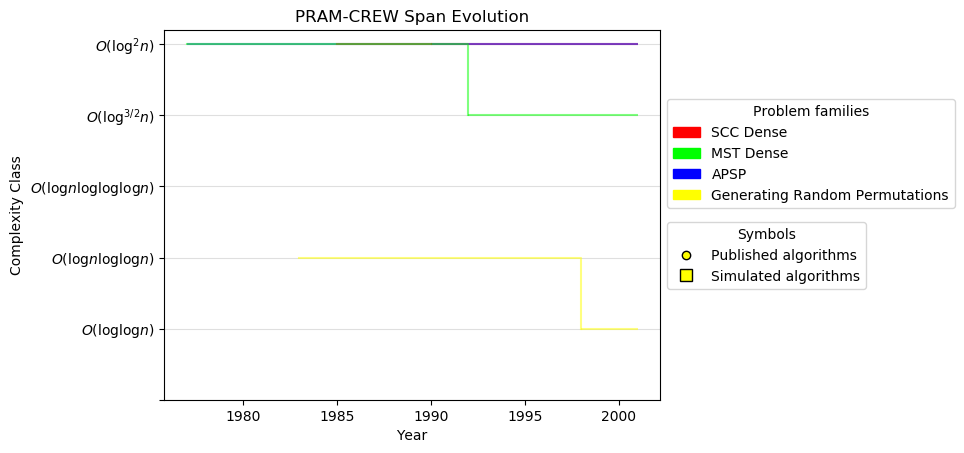

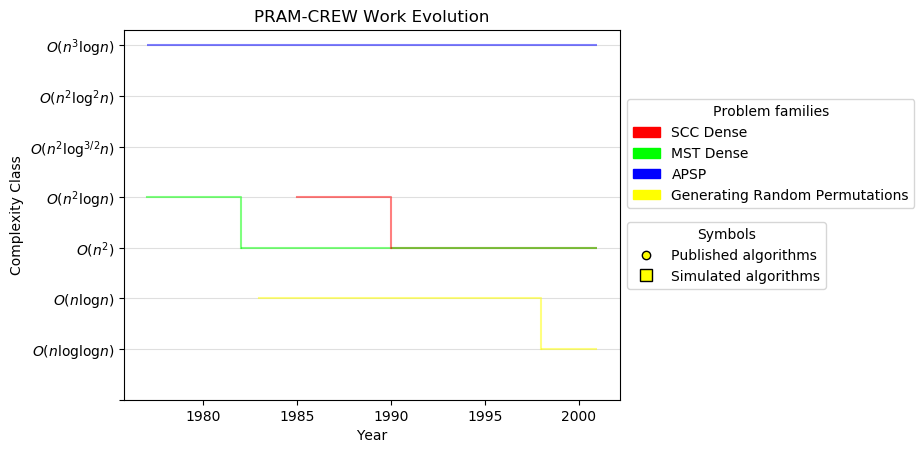

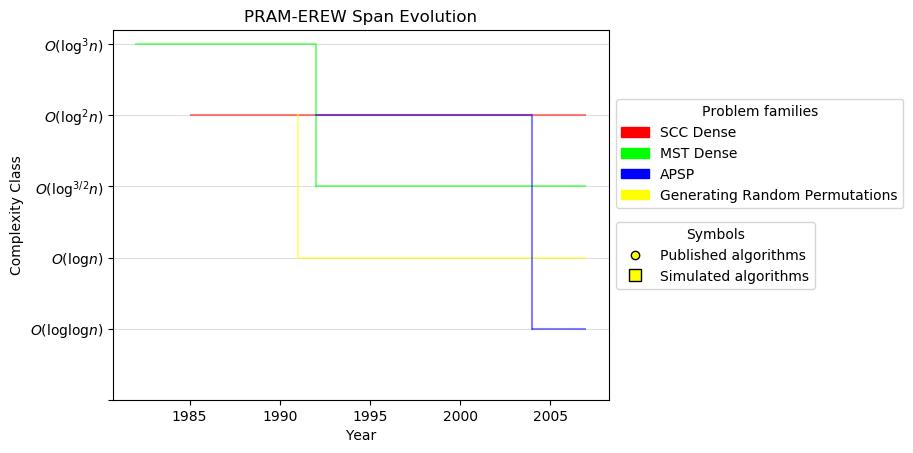

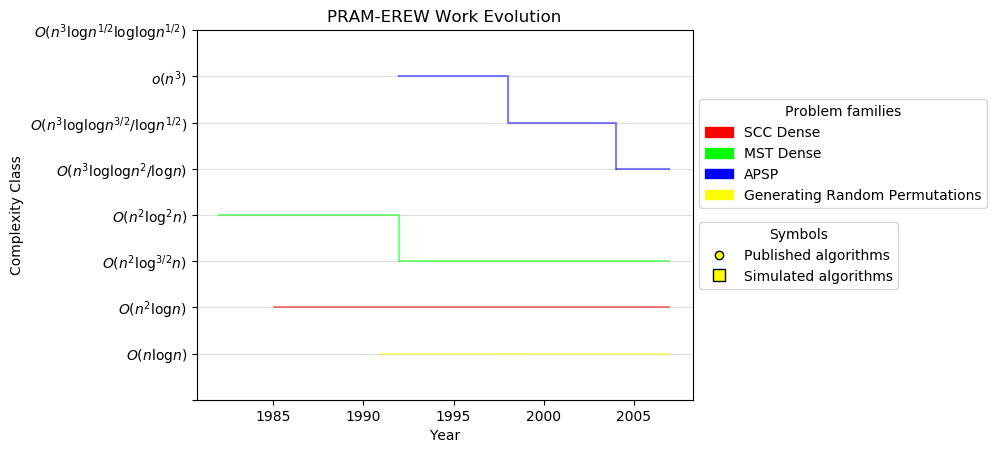

In [3]:
# all improvement lines for a given model
def model_progress(data, model):
    data = {k: v for k, v in data.items() if v["model"]==model}
    names = list(data.keys())
    names.sort(key= lambda name: (data[name]["year"], -1*data[name]["span"]))
    years = [data[name]["year"] for name in names]
    spans = [data[name]["span"] for name in names]
    works = [data[name]["work"] for name in names]
    models = [data[name]["model"] for name in names]
    ghosts = [data[name]["sim"] for name in names]
    pars = [data[name]["par"] for name in names]
    problems, prob_names = standardize_prob([data[name]["problem"] for name in names])
    colors = [all_colors[p] for p in problems]

    spans, span_complexities = standardize_comp(spans)
    works, work_complexities = standardize_comp(works)
    pars, par_complexities = standardize_comp(pars)
    # span_complexities,work_complexities,we_complexities,par_complexities,complexity_models

    span_ranges = list(range(0,len(span_complexities)))
    work_ranges = list(range(0,len(work_complexities)))
    par_ranges = list(range(0,len(par_complexities)))

    plt.style.use('default')
    # SPAN vs TIME
    def span_vs_time():
        fig, ax = plt.subplots(1,1)
        ax.grid(axis='y', alpha=0.4)
        for p in range(1,len(prob_names)):
            m_years = [years[i] for i in range(len(years)) if problems[i]==p]
            m_spans = [spans[i] for i in range(len(spans)) if problems[i]==p]
            i = 1
            while i < len(m_spans):
                if m_spans[i] > m_spans[i-1]:
                    m_spans.pop(i)
                    m_years.pop(i)
                else:
                    i += 1
            ax.step(m_years, m_spans, c=all_colors[p], where='post', alpha=0.5)
            if m_spans != []:
                ax.hlines(y=m_spans[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[p],alpha=0.5)
        # ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==1], 
        #         [spans[i] for i in range(len(spans)) if ghosts[i]==1], 
        #         c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
        #         marker='s',s=121,zorder=101,edgecolors='black',linewidth=0.7, alpha=0.5)
        # ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==0], 
        #         [spans[i] for i in range(len(spans)) if ghosts[i]==0], 
        #         c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
        #         marker='o',zorder=100,edgecolors='black',linewidth=0.7, alpha=0.5)
        ax.set_yticks(span_ranges)
        ax.set_yticklabels(span_complexities)
        ax.set_title(model_dict[model]+" Span Evolution")
        ax.set_ylabel("Complexity Class")
        ax.set_xlabel("Year")
        ax.xaxis.get_major_locator().set_params(integer=True)
        # legends
        handles = []
        for i in range(1,len(set(problems))+1):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=prob_names[i])
            handles.append(new_patch)
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Problem families")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        plt.show()

    
    # WORK vs TIME
    def work_vs_time():
        fig, ax = plt.subplots(1,1)
        ax.grid(axis='y', alpha=0.4)
        for p in range(1,len(prob_names)):
            m_years = [years[i] for i in range(len(years)) if problems[i]==p]
            m_works = [works[i] for i in range(len(works)) if problems[i]==p]
            i = 1
            while i < len(m_works):
                if m_works[i] > m_works[i-1]:
                    m_works.pop(i)
                    m_years.pop(i)
                else:
                    i += 1
            ax.step(m_years, m_works, c=all_colors[p], where='post', alpha=0.5)
            if m_works != []:
                ax.hlines(y=m_works[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[p],alpha=0.5)
        # ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==1], 
        #         [works[i] for i in range(len(works)) if ghosts[i]==1], 
        #         c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
        #         marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        # ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==0], 
        #         [works[i] for i in range(len(works)) if ghosts[i]==0], 
        #         c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
        #         marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        ax.set_yticks(work_ranges)
        ax.set_yticklabels(work_complexities)
        ax.set_title(model_dict[model]+" Work Evolution")
        ax.set_ylabel("Complexity Class")
        ax.set_xlabel("Year")
        ax.xaxis.get_major_locator().set_params(integer=True)
        # legends
        handles = []
        for i in range(1,len(set(problems))+1):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=prob_names[i])
            handles.append(new_patch)
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Problem families")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        plt.show()

    span_vs_time()
    work_vs_time()
    pass

model_progress(full_data, 120) # (PRAM CREW) (9 algos)
model_progress(full_data, 110) # (PRAM EREW) (7 algos)


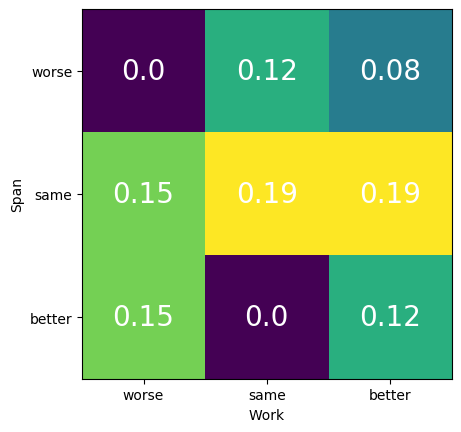

In [4]:
# span/work improvement heatmap
def improvement_heatmap(data):
    names = list(data.keys())    
    frequency_map = np.zeros((3,3))
    number = 0
    for name in names:
        sp_inc = data[name]["sp"]
        wk_inc = data[name]["wk"]
        if (sp_inc != None) & (wk_inc != None):
            frequency_map[sp_inc+1][wk_inc+1] += 1
            number += 1
    frequency_map = np.round(frequency_map/number,2)
    
    plt.style.use('default')
    _, ax = plt.subplots()
    _ = ax.imshow(frequency_map)    
    ax.set_xticks(np.arange(3))
    ax.set_yticks(np.arange(3))
    ax.set_xticklabels(["worse", "same", "better"])
    ax.set_yticklabels(["worse", "same", "better"])
    ax.set_xlabel("Work")
    ax.set_ylabel("Span")
    for i in range(3):
        for j in range(3):
            text = ax.text(j, i, frequency_map[i, j],
                        ha="center", va="center", color="w", size=20)
    plt.show()

data = {
"13.13": {"sp": None, "wk": None},
"13.17": {"sp": None, "wk": None},
"13.18": {"sp": None, "wk": None},
"13.14": {"sp": 0, "wk": -1},
"13.15": {"sp": 0, "wk": 0},
"13.19": {"sp": None, "wk": None},
"13.122": {"sp": 0, "wk": 1},
"13.11": {"sp": None, "wk": None},
"13.12": {"sp": None, "wk": None},
"13.16": {"sp": 0, "wk": 1},
"13.110": {"sp": None, "wk": None},
"13.119": {"sp": None, "wk": None},
"13.113": {"sp": 1, "wk": -1},
"13.117": {"sp": None, "wk": None},
"13.118": {"sp": None, "wk": None},
"13.120": {"sp": None, "wk": None},
"13.121": {"sp": 0, "wk": 0},
"13.112": {"sp": 0, "wk": -1},
"13.115": {"sp": 0, "wk": 0},
"13.111": {"sp": -1, "wk": 1},
"13.116": {"sp": 0, "wk": 1},
"13.114": {"sp": 0, "wk": -1},
"14.12": {"sp": None, "wk": None},
"14.13": {"sp": None, "wk": None},
"14.14": {"sp": None, "wk": None},
"14.15": {"sp": None, "wk": None},
"14.16": {"sp": None, "wk": None},
"14.17": {"sp": 0, "wk": -1},
"14.18": {"sp": 0, "wk": 0},
"14.19": {"sp": None, "wk": None},
"14.110": {"sp": 0, "wk": 1},
"14.111": {"sp": 1, "wk": 1},
"14.112": {"sp": 1, "wk": -1},
"14.11": {"sp": None, "wk": None},
"171": {"sp": None, "wk": None},
"172": {"sp": None, "wk": None},
"173": {"sp": None, "wk": None},
"174": {"sp": None, "wk": None},
"175": {"sp": None, "wk": None},
"176": {"sp": None, "wk": None},
"177": {"sp": -1, "wk": 1},
"1711": {"sp": None, "wk": None},
"178": {"sp": 0, "wk": 1},
"179": {"sp": 1, "wk": 1},
"1710": {"sp": None, "wk": None},
"339": {"sp": None, "wk": None},
"331": {"sp": None, "wk": None},
"332": {"sp": 1, "wk": -1},
"3310": {"sp": -1, "wk": 0},
"335": {"sp": 1, "wk": -1},
"336": {"sp": -1, "wk": 0},
"337": {"sp": None, "wk": None},
"338": {"sp": None, "wk": None},
"3312": {"sp": -1, "wk": 0},
"3311": {"sp": None, "wk": None},
"333": {"sp": 1, "wk": 1},
"334": {"sp": 0, "wk": 0},
}

improvement_heatmap(data)

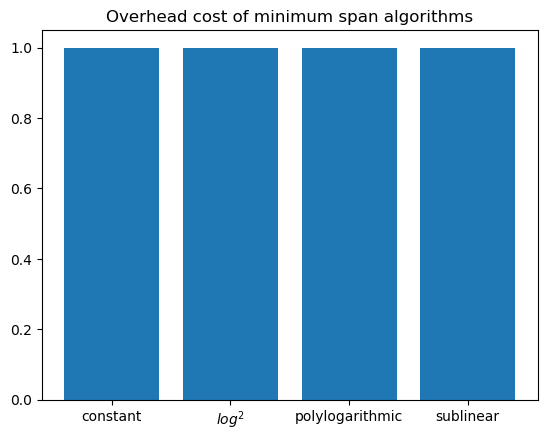

In [5]:
# work overhead of the minimum span algorithms histogram
def work_overhead_histo(aux_data, normalized=False):
    problems = list(aux_data.keys())
    bs_oh_list = sorted([aux_data[prob]["bs overhead"] for prob in problems])
    overhead_list = [complexity_category_1(bs_oh) for bs_oh in bs_oh_list]
    overhead_dict = {}
    for bs_oh in overhead_list:
        if bs_oh in overhead_dict:
            overhead_dict[bs_oh] += 1
        else:
            overhead_dict[bs_oh] = 1

    if normalized:
        values = [x/len(bs_oh_list) for x in overhead_dict.values()]
    else:
        values = overhead_dict.values()

    plt.style.use('default')
    fig, ax = plt.subplots(1,1)
    ax.bar(overhead_dict.keys(), values, align='center')
    ax.set_title("Overhead cost of minimum span algorithms")
    if normalized:
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    # ax.hist(overhead_list,bins=4)
    plt.show()

work_overhead_histo(aux_data, normalized=False)

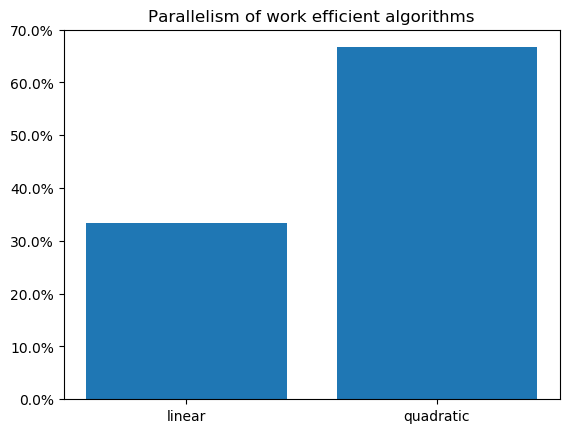

In [26]:
# best parallelism of work efficient algorithms histogram
def we_parallelism_histo(aux_data, normalized=False):
    problems = list(aux_data.keys())
    we_par_list = sorted([aux_data[prob]["we par"] for prob in problems if aux_data[prob]["we exist"]==1])
    overhead_list = [complexity_category_1(we_par) for we_par in we_par_list]
    overhead_dict = {}
    for we_par in overhead_list:
        if we_par in overhead_dict:
            overhead_dict[we_par] += 1
        else:
            overhead_dict[we_par] = 1

    if normalized:
        values = [x/len(we_par_list) for x in overhead_dict.values()]
    else:
        values = overhead_dict.values()

    plt.style.use('default')
    fig, ax = plt.subplots(1,1)
    ax.bar(overhead_dict.keys(), values, align='center')
    ax.set_title("Parallelism of work efficient algorithms")
    if normalized:
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    # ax.hist(overhead_list,bins=4)
    plt.show()

we_parallelism_histo(aux_data, normalized=True)


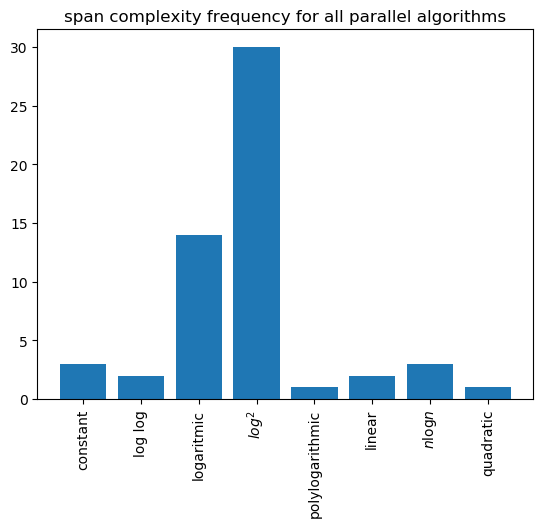

In [25]:
# histogram of the given aspect (e.g. "span", "work") for all problems
def all_algorithms_histo(data, aspect, normalized=False):
    if aspect == "span" or aspect == "work eff":
        fun = complexity_category_1
    elif aspect == "work":
        fun = complexity_category_n
    elif aspect == "bs span" or aspect == "bs overhead":
        fun = complexity_category_1
    else:
        raise ValueError("Can't plot the historgram for this aspect of parallel algorithms: "+str(aspect))
    
    if aspect == "bs span" or aspect == "bs overhead":
        algs = data
    else:
        algs = {k: v for k, v in data.items() if v["sim"]==0}
    names = list(algs.keys())

    spans_list = sorted([algs[name][aspect] for name in names])
    span_categories_list = [fun(raw_span) for raw_span in spans_list]
    span_categories_dict = {}
    for span in span_categories_list:
        if span in span_categories_dict:
            span_categories_dict[span] += 1
        else:
            span_categories_dict[span] = 1

    if normalized:
        values = [x/len(spans_list) for x in span_categories_dict.values()]
    else:
        values = span_categories_dict.values()

    plt.style.use('default')
    fig, ax = plt.subplots(1,1)
    ax.bar(span_categories_dict.keys(), values, align='center')
    ax.set_title(aspect+" complexity frequency for all parallel algorithms")
    ax.set_xticklabels(span_categories_dict.keys(), rotation=90)
    if normalized:
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
    # ax.hist(overhead_list,bins=4)
    plt.show()

all_algorithms_histo(full_data, "span", normalized=False)

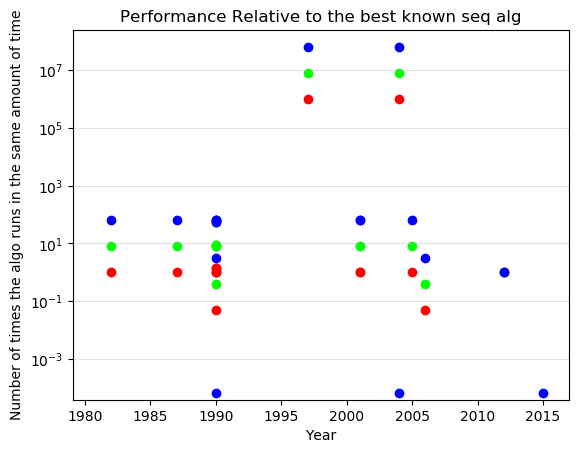

In [35]:
# algorithmic speed up vs year for 2-3 specific algorithms at fixed n (e.g. n=1,000,000) 
# (analog of Figure 2a from How_Fast_Do_Algorithms_Improve)

# The solid line is serial speedup, the dotted lines represent speedup at different 
# numbers of processors (eg p = {8,64,1024})


# 1st photo top: graph of algorithmic speed up vs year for 2-3 specific algorithms (analog of Figure
# 2a from How_Fast_Do_Algorithms_Improve) at fixed n (eg n=1,000,000). The solid line is serial 
# speedup, the dotted lines represent speedup at different numbers of processors (eg p = {8,64,1024}). 
# Either have an annotation at the bottom (or a graph) of how many cores are available in that year. 
# The black line follows the speedup gated by number of available cores, so when lots of parallelism 
# is available it might be below the dotted line staircasing every two years or so (possibly we want 
# one for cores and one for processors in supercomputers?).

# Current problems that need to be solved:
# - data not representative (not every relevant algorithm has span in terms of p)
# - not taking into account different models or problem variations
# 
def old_relative_performance_graph(data):
    n = 10**6
    prob = 14
    brute_force = n2logn
    best_seq = n2

    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    
    possible_p = [1,8,64]
    for i in range(len(possible_p)):
        p = possible_p[i]
        c = all_colors[i+1]
        # ax.scatter(1940, 1, c=c)
        for alg in data:
            # if data[alg]["problem"] == prob:
            x = data[alg]["year"]
            y = best_seq(n)/data[alg]["span fn"](n,p)
            ax.scatter(x,y,c=c)
    
    ax.set_yscale('log')
    ax.set_title("Performance Relative to the best known seq alg")
    ax.set_ylabel("Number of times the algo runs in the same amount of time")
    ax.set_xlabel("Year")
    plt.show()

    pass


def n3(n):
    return n**3
def n2(n):
    return n**2
def n2logn(n):
    return n**2*math.log(n,2)

def span_1(n,p):
    return n**3*math.log(n,2)/p
def span_2(n,p):
    return n**3/p + n**2/p**(2/3)
def span_3(n,p):
    return n**2/p
def span_4(n,p):
    return n**2/p*math.log(n,2)/math.log(n**2/(p**2*max(math.log(p,2),1))) + n/p*max(math.log(p,2),1)
def span_5(n,p):
    return n**2/p*math.log(n,2)/math.log(n**2/(p**2*max(math.log(p,2),1))) + n/p*max(math.log(p,2),1)
def span_6(n,p):
    return n**2/p + (n*math.log(n,2))/p + math.log(n,2)**2
def span_7(n,p):
    return n**2/p + n*max(math.log(p,2),1)
def span_8(n,p):
    return n**2/p + math.log(n,2)**2*log_star(n,2)
def span_9(n,p):
    return n**2/p + (n*math.log(n,2))/p + math.log(n,2)**2
def span_10(n,p):
    return n**2*math.log(n,2)/p
def span_11(n,p):
    return n**2 + n/p + math.log(n,2)**2
def span_14(n,p):
    return n**3*max(math.log(p,2),1)/p
def span_15(n,p):
    return n**2*math.log(n,2)/p + math.log(n,2)*max(math.log(p,2),1)
def span_16(n,p):
    return n**2/p
def span_17(n,p):
    return n**2/p + math.log(n,2)**2*log_star(n,2)
def span_20(n,p):
    return n/p + math.log(n,2)
def span_21(n,p):
    return n**2/p + math.log(n,2)
def span_23(n,p):
    return n/p
def span_24(n,p):
    return n**3/p
def span_25(n,p):
    return n**3/p


data = {
"1": {"year": 1981, "problem": 5, "span fn": span_1, "model": 100},
"2": {"year": 1990, "problem": 6, "span fn": span_2, "model": 100},
"3": {"year": 1982, "problem": 13, "span fn": span_3, "model": 130},
"4": {"year": 1990, "problem": 13, "span fn": span_4, "model": 300},
"5": {"year": 1990, "problem": 13, "span fn": span_5, "model": 300},
"6": {"year": 1990, "problem": 13, "span fn": span_6, "model": 120},
"7": {"year": 1990, "problem": 13, "span fn": span_7, "model": 300},
"8": {"year": 2001, "problem": 13, "span fn": span_8, "model": 110},
"9": {"year": 1990, "problem": 13, "span fn": span_9, "model": 120},
"10": {"year": 2006, "problem": 14, "span fn": span_10, "model": 100},
"11": {"year": 2012, "problem": 14, "span fn": span_11, "model": 600},
"14": {"year": 2002, "problem": 14, "span fn": span_14, "model": 120},
"15": {"year": 1990, "problem": 14, "span fn": span_15, "model": 300},
"16": {"year": 1987, "problem": 14, "span fn": span_16, "model": 110},
"17": {"year": 2001, "problem": 14, "span fn": span_17, "model": 110},
"20": {"year": 1997, "problem": 17, "span fn": span_20, "model": 110},
"21": {"year": 2005, "problem": 17, "span fn": span_21, "model": 110},
"23": {"year": 2004, "problem": 80, "span fn": span_23, "model": 400},
"24": {"year": 2004, "problem": 80, "span fn": span_24, "model": 400},
"25": {"year": 2015, "problem": 80, "span fn": span_25, "model": 400},
}


new_relative_performance_graph(data)
# print(data["23"]["span fn"](10,2))

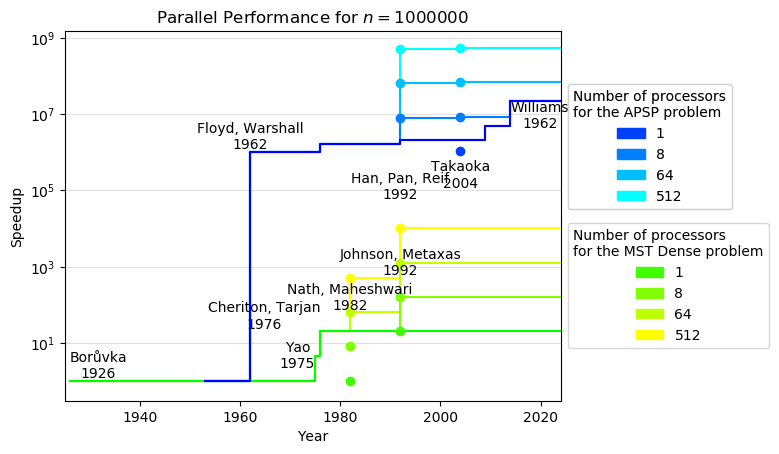

In [143]:
# algorithmic speed up vs year for 2-3 specific algorithms at fixed n (e.g. n=1,000,000) 
# (analog of Figure 2a from How_Fast_Do_Algorithms_Improve)

# The solid line is serial speedup, the dotted lines represent speedup at different 
# numbers of processors (eg p = {8,64,1024})


# 1st photo top: graph of algorithmic speed up vs year for 2-3 specific algorithms (analog of Figure
# 2a from How_Fast_Do_Algorithms_Improve) at fixed n (eg n=1,000,000). The solid line is serial 
# speedup, the dotted lines represent speedup at different numbers of processors (eg p = {8,64,1024}). 
# Either have an annotation at the bottom (or a graph) of how many cores are available in that year. 
# The black line follows the speedup gated by number of available cores, so when lots of parallelism 
# is available it might be below the dotted line staircasing every two years or so (possibly we want 
# one for cores and one for processors in supercomputers?).

# Current problems that need to be solved:
# - data not representative (not every relevant algorithm has span in terms of p)
# - not taking into account different models or problem variations
# 

# const: true if taking into account leading constants for algorithm complexity times
def new_restricted_performance_graph(data,seq_data,problems,const=False):
    n = 10**6
    possible_p = [1,8,64,512]
    present_year=2023


    temp_colors = {14.1:{1:"#ffff00",2:"#00ff00"},
                   17:{1:"#00ffff",2:"#0000ff"}}
    span_type = "const span fn" if const else "span fn"
    plt.style.use('default')
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    all_years = set()
    all_years.update([seq_data[name]["year"] for name in seq_data.keys()])
    all_years.update([data[alg]["year"] for alg in data])
    all_years.add(present_year)

    for pr_i in range(len(problems)):
        problem = problems[pr_i]
        color1 = temp_colors[problem][1]
        color2 = temp_colors[problem][2]
        prob_colors = list(Color(color1).range_to(Color(color2),len(possible_p)+1)) # #cccccc
        name = problem_dict[problem]

        # sequential data
        algs = {k: v for k, v in seq_data.items() if v["problem"]==problem}
        names = list(algs.keys())
        names.sort(key= lambda name: (algs[name]["year"], -1*algs[name]["time"]))
        years = [algs[name]["year"] for name in names]
        auths = [algs[name]["auth"] for name in names]
        span_fns = [algs[name][span_type] for name in names]
        first_seq = algs[names[0]][span_type]

        points = [first_seq(n)/time(n) for time in span_fns]
        ax.step(years, points, c=prob_colors[-1].hex_l, where='post',zorder=100)
        ax.hlines(y=points[-1],xmin=years[-1],xmax=max(all_years)+1,color=prob_colors[-1].hex_l,zorder=100)
        
        # parallel data
        prob_data = {k: v for k, v in data.items() if v["problem"]==problem}
        p_names = list(prob_data.keys())
        p_names.sort(key= lambda name: (prob_data[name]["year"]))
        for i in range(len(possible_p)):
            p = possible_p[i]
            col = prob_colors[-i-2].hex_l

            p_years = []
            p_points = []
            for p_name in p_names:
                x = prob_data[p_name]["year"]
                y = first_seq(n)/prob_data[p_name][span_type](n,p)
                p_years.append(x)
                p_points.append(y)

            # TODO: condense.
            if p_years[0]<years[0] or (p_years[0]==years[0] and p_points[0]>=points[0]):
                s_i=0
                p_i=1
                both_years = [p_years[0]]
                both_points = [p_points[0]]
            else:
                s_i=1
                p_i=0
                both_years = [years[0]]
                both_points = [points[0]]

            while s_i<len(years) and p_i<len(p_years):
                if p_years[p_i]<years[s_i] or (p_years[p_i]==years[s_i] and p_points[p_i]>=points[s_i]):
                    if p_points[p_i] > both_points[-1]:
                        both_years.append(p_years[p_i])
                        both_points.append(p_points[p_i])
                        if p_years[p_i]==years[s_i]:
                            s_i+=1
                    p_i+=1
                elif years[s_i]<p_years[p_i] or (p_years[p_i]==years[s_i] and points[s_i]>p_points[p_i]):
                    if points[s_i] > both_points[-1]:
                        both_years.append(years[s_i])
                        both_points.append(points[s_i])
                        if p_years[p_i]==years[s_i]:
                            p_years.pop(p_i)
                            p_points.pop(p_i)
                    s_i+=1
                else:
                    raise IndexError("at indexes "+str(s_i)+" and "+str(p_i))

            assert (p_i==len(p_years) or s_i==len(years))
            if s_i<len(years):
                for j in range(len(points[s_i:])):
                    if points[s_i+j] > both_points[-1]:
                        both_points.append(points[s_i+j])
                        both_years.append(years[s_i+j])
            elif p_i<len(p_years):
                for j in range(len(p_points[p_i:])):
                    if p_points[p_i+j] > both_points[-1]:
                        both_points.append(p_points[p_i+j])
                        both_years.append(p_years[p_i+j])
            else:
                raise IndexError("something went terribly wrong. i forgot how to spell terribly.")
            
            ax.scatter(p_years,p_points,c=str(col),zorder=100)
            ax.step(both_years,both_points,c=str(col), where='post',zorder=99-i)
            ax.hlines(y=both_points[-1],xmin=both_years[-1],xmax=max(all_years)+1,color=str(col),zorder=99-i)


        # # TODO: HARDCODED ANNOTATIONS
        if pr_i==0:
            ax.annotate(auths[0]+'\n'+str(years[0]), multialignment='center', fontsize=10,
                xy=(years[0], points[0]), xycoords='data', ha='left', va='bottom')
            ax.annotate(auths[1]+'\n'+str(years[1]), multialignment='center', fontsize=10,
                xy=(years[1], points[1]), xycoords='data', ha='right', va='center')
            ax.annotate(auths[2]+'\n'+str(years[2]), multialignment='center', fontsize=10,
                xy=(years[2], points[2]), xycoords='data', ha='right', va='bottom')
            ax.annotate(data["1"]["auth"]+'\n'+str(data["1"]["year"]), multialignment='center', fontsize=10,
                xy=(data["1"]["year"], 500), xycoords='data', ha='center', va='bottom',zorder=101)
            ax.annotate(data["2"]["auth"]+'\n'+str(data["2"]["year"]), multialignment='center', fontsize=10,
                xy=(data["2"]["year"], 60), xycoords='data', ha='center', va='bottom',zorder=101)
        elif pr_i==1:
            ax.annotate(auths[1]+'\n'+str(years[1]), multialignment='center', fontsize=10,
                xy=(years[1], points[1]), xycoords='data', ha='center', va='bottom')
            ax.annotate(auths[5]+'\n'+str(years[1]), multialignment='center', fontsize=10,
                xy=(years[5], points[5]), xycoords='data', ha='left', va='top')
            ax.annotate(data["3"]["auth"]+'\n'+str(data["3"]["year"]), multialignment='center', fontsize=10,
                xy=(data["3"]["year"], 50000), xycoords='data', ha='center', va='bottom',zorder=101)
            ax.annotate(data["4"]["auth"]+'\n'+str(data["4"]["year"]), multialignment='center', fontsize=10,
                xy=(data["4"]["year"], 100000), xycoords='data', ha='center', va='bottom',zorder=101)
        

        # legends
        handles = []
        for i in range(len(possible_p)):
            new_patch = mpatches.Patch(color=str(prob_colors[-i-2].hex_l), label=possible_p[i])
            handles.append(new_patch)
        if pr_i==0:
            locc="upper left"
        else:
            locc = "lower left"
        model_legend = ax.legend(handles=handles,loc=locc, bbox_to_anchor=(1, 0.5), 
                                title="Number of processors\nfor the "+name+" problem")
        ax.add_artist(model_legend)
    
    ax.set_yscale('log')
    ax.set_title("Parallel Performance for $n="+str(n)+"$")
    ax.set_ylabel("Speedup")
    ax.set_xlabel("Year")
    ax.set_xlim(min(all_years)-1,max(all_years)+1)
    plt.show()
    pass

################# MST ##########################################################
def jm92_span(n,p):
    m = n**2
    return max(m/p, max(math.log(n,2),1)**(3/2), n*max(math.log(n,2),1)**(3/2)/ p)
def jm92_span_const(n,p):
    m = n**2/2
    return 15*max(m/p, max(math.log(n,2),1)**(3/2), n*max(math.log(n,2),1)**(3/2)/ p)
def nm82_span(n,p):
    return max(math.log(n,2),1) * max(1, n**2/p)
def nm82_span_const(n,p):
    return 6*max(math.log(n,2),1) * max(1, n**2/2/p) + max(1, n/p)*max(math.log(n,2),1) + 2*max(1, n/p)

def bo26(n):
    return n**2*max(math.log(n,2),1)
def bo26_const(n):
    return 1.5*n**2*max(math.log(n,2),1) + 2*n**2 + 2*n*max(math.log(n,2),1)

def yao75(n):
    return n**2*max(math.log(max(math.log(n,2),1),2),1)
def yao75_const(n):
    return 3*n**2*max(math.log(max(math.log(n,2),1),2),1) + 2.5*n**2 + 2*n**2/max(math.log(n,2),1) + 2*n

def ct76(n):
    return n**2
def ct76_const(n):
    return 8*n**2+4*n

################# APSP #########################################################
def hpr92_span(n,p):
    return max(n**3/p, max(math.log(n,2),1)**2)
def hpr92_span_const(n,p):
    return
# TODO
def ta04_span(n,p):
    return max((n**3 * (max(math.log(max(math.log(n,2),1),2),1)) / max(math.log(n,2),1))/p,1) *(max(math.log(max(math.log(n,2),1),2),1))
def ta04_span_const(n,p):
    return max((n**3 * (max(math.log(max(math.log(n,2),1),2),1)) / max(math.log(n,2),1))/p,1) *(max(math.log(max(math.log(n,2),1),2),1))

def sh53(n):
    return n**4
def sh53_const(n):
    return n**4

def fw62(n):
    return n**3
def fw62_const(n):
    return n**3

def fr76(n):
    return n**3 * (max(math.log(max(math.log(n,2),1),2),1) / max(math.log(n,2),1))**(1/3)
def fr76_const(n):
    return n**3 * (max(math.log(max(math.log(n,2),1),2),1) / max(math.log(n,2),1))**(1/3)

def ta92(n):
    return n**3 * (max(math.log(max(math.log(n,2),1),2),1) / max(math.log(n,2),1))**(1/2)
def ta92_const(n):
    return n**3 * (max(math.log(max(math.log(n,2),1),2),1) / max(math.log(n,2),1))**(1/2)

def ta04(n):
    return n**3 * (max(math.log(max(math.log(n,2),1),2),1))**2 / max(math.log(n,2),1)
def ta04_const(n):
    return n**3 * (max(math.log(max(math.log(n,2),1),2),1))**2 / max(math.log(n,2),1)

def ch09(n):
    return n**3 * (max(math.log(max(math.log(n,2),1),2),1))**3 / (max(math.log(n,2),1))**2
def ch09_const(n):
    return n**3 * (max(math.log(max(math.log(n,2),1),2),1))**3 / (max(math.log(n,2),1))**2

def wi14(n):
    return n**3 /2**((max(math.log(n,2),1))**0.5)
def wi14_const(n):
    return n**3 /2**((max(math.log(n,2),1))**0.5)

data = {
"1": {"problem": 14.1, "year": 1992, "auth": "Johnson, Metaxas", "span fn": jm92_span, "const span fn": jm92_span_const, "model": 110},
"2": {"problem": 14.1, "year": 1982, "auth": "Nath, Maheshwari", "span fn": nm82_span, "const span fn": nm82_span_const, "model": 110},
"3": {"problem": 17, "year": 1992, "auth": "Han, Pan, Reif", "span fn": hpr92_span, "const span fn": hpr92_span_const, "model": 110},
"4": {"problem": 17, "year": 2004, "auth": "Takaoka", "span fn": ta04_span, "const span fn": ta04_span_const, "model": 110},
}
seq_data = {
"1": {"problem": 14.1, "year": 1926, "auth": "Borůvka", "time": 21, "span fn":bo26, "const span fn": bo26_const},
"2": {"problem": 14.1, "year": 1975, "auth": "Yao", "time": 20.1, "span fn":yao75, "const span fn": yao75_const},
"3": {"problem": 14.1, "year": 1976, "auth": "Cheriton, Tarjan", "time": 20, "span fn":ct76, "const span fn": ct76_const},
"4": {"problem": 17, "year": 1953, "auth": "Shimbel", "time": 40, "span fn": sh53, "const span fn": sh53_const},
"5": {"problem": 17, "year": 1962, "auth": "Floyd, Warshall", "time": 30, "span fn": fw62, "const span fn": fw62_const},
"6": {"problem": 17, "year": 1976, "auth": "Fredman", "time": 29.9999, "span fn": fr76, "const span fn": fr76_const},
"7": {"problem": 17, "year": 1992, "auth": "Takaoka", "time": 29.9998, "span fn": ta92, "const span fn": ta92_const},
# "8": {"problem": 17, "year": 2004, "auth": "Takaoka", "time": 29.9997, "span fn": ta04, "const span fn": ta04_const},
"9": {"problem": 17, "year": 2009, "auth": "Chan", "time": 29.9996, "span fn": ch09, "const span fn": ch09_const},
"10": {"problem": 17, "year": 2014, "auth": "Williams", "time": 29.9995, "span fn": wi14, "const span fn": wi14_const},
}

new_restricted_performance_graph(data, seq_data, [14.1,17],const=False)

[0, 1, 2]
[0.30434782608695654, 0.1956521739130435, 0.8043478260869565]
['0-10%', '10-20%', '20-30%']


TypeError: set_xticks() got an unexpected keyword argument 'labels'

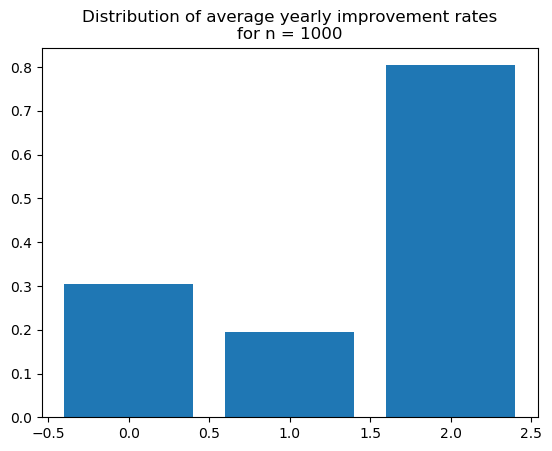

In [11]:
# Distribution of average yearly improvement rates (original paper figure 3)

# requires at least 2 buckets
def yearly_impr_rate_histo(data, buckets, n):
    # sort the algos based on increasing year, then based on decreasing span
    names = list(data.keys())
    names.sort(key= lambda name: (data[name]["year"], -1*data[name]["span"]))

    worst_algs = {} # dict of problem families started and their worst alg found
    all_rates = []
    for name in names:
        algo = data[name]
        if algo["problem"] not in worst_algs:
            worst_algs[algo["problem"]] = name
        else:
            worst = data[worst_algs[algo["problem"]]]
            # only consider legal algorithms (with a valid rate of improvement)
            if algo["year"] > worst["year"] and algo["span"] <= worst["span"]:
                impr_ratio = worst["span fn"](n) / algo["span fn"](n)
                yearly_impr_rate = impr_ratio ** (1/(algo["year"]-worst["year"]))-1
                all_rates.append(yearly_impr_rate)

    # find the distribution values to be plotted
    assert len(buckets) >= 2
    all_rates.sort()
    buckets[0]["count"] = bisect.bisect_left(all_rates, buckets[0]["max"])
    for i in range(1,len(buckets)-1):
        max_val = buckets[i]["max"]
        max_or_lower = bisect.bisect_left(all_rates, max_val)
        buckets[i]["count"] = max_or_lower - buckets[i-1]["count"]
    buckets[-1]["count"] = len(all_rates) - buckets[-2]["count"]
    for i in range(len(buckets)):
        buckets[i]["share"] = buckets[i]["count"] / len(all_rates)
    
    # drawing the distribution histogram
    plt.style.use('default')
    fig, ax = plt.subplots(1,1)
    values = [buckets[i]["share"] for i in range(len(buckets))]
    labels = [buckets[i]["label"] for i in range(len(buckets))]
    print(list(range(len(buckets))))
    print(values)
    print(labels)
    ax.bar(list(range(len(buckets))), values, align='center')
    ax.set_title("Distribution of average yearly improvement rates\nfor n = "+str(n))
    ax.set_xticks(list(range(len(buckets))),labels=labels)
    # ax.hist(overhead_list,bins=4)
    plt.show()


buckets = [{"max": 0.1, "label": "0-10%"},
            {"max": 0.2, "label": "10-20%"},
            {"max": 0.3, "label": "20-30%"},]
                                            #0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, math.inf}
yearly_impr_rate_histo(full_data, buckets, 10**3)
print(buckets) # TODO: deal with the input (buckets) being modified

